In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import seaborn as sbn

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow import keras

In [ ]:
from PIL import Image,ImageChops,ImageEnhance
import os
from pylab import *
import re

In [ ]:
import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices: tf.config.experimental.set_memory_growth(device, True)

In [ ]:
import gc

In [ ]:
sbn.set_theme(style='white',context='notebook',palette='viridis')

In [ ]:
def to_elaimg(path,quality):
    filename=path
    resaved_filename = filename.split('.')[0]+'_resaved.jpg'
    #ela_filename = filename.split('.')[0]+'ela.jpg'
    img = Image.open(filename).convert('RGB')
    img.save(resaved_filename,'JPEG',quality=quality)
    resaved_img = Image.open(resaved_filename)
    ela_img = ImageChops.difference(img,resaved_img)
    extrema = ela_img.getextrema()
    max_diff = max(ex[1] for ex in extrema)
    if max_diff==0:
        max_diff=1
    scale=255.0/max_diff
    ela_img=ImageEnhance.Brightness(ela_img).enhance(scale)
    return ela_img

##REAL IMAGE

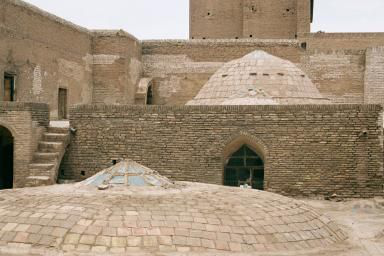

In [ ]:
im1=Image.open('/content/gdrive/MyDrive/Image Forgery/Au/Au_arc_00059.jpg')
im1

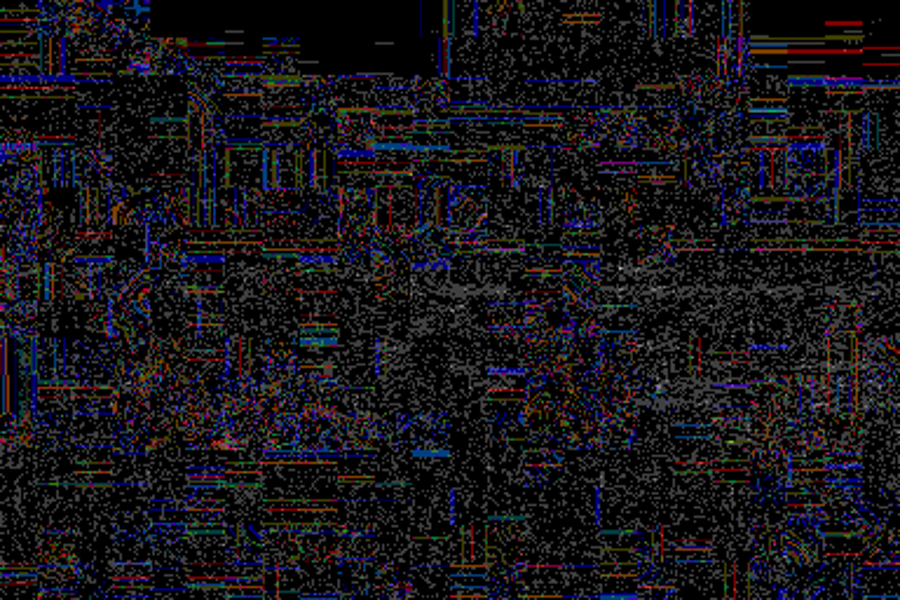

In [ ]:
ela_im1 = to_elaimg('/content/gdrive/MyDrive/Image Forgery/Au/Au_arc_00059.jpg',90)
ela_im1 = ela_im1.resize((900,600))
ela_im1

In [ ]:
del ela_im1

In [ ]:
del im1

##TAMPERED IMAGE

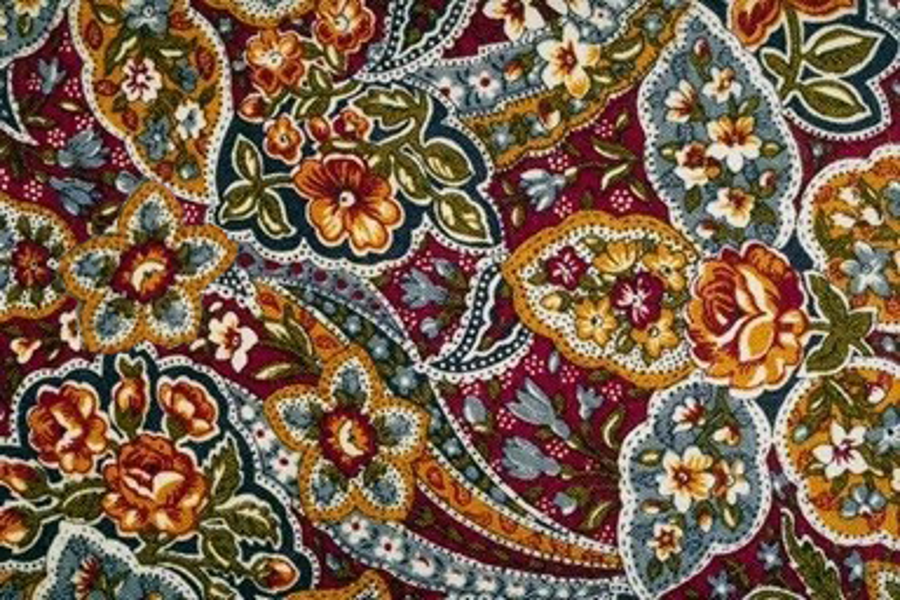

In [ ]:
tmp_1 = Image.open('/content/gdrive/MyDrive/Image Forgery/Final_Project/Tp/Tp_S_CNN_S_N_txt00050_txt00050_01277.tif')
tmp_1=tmp_1.resize((900,600))
tmp_1

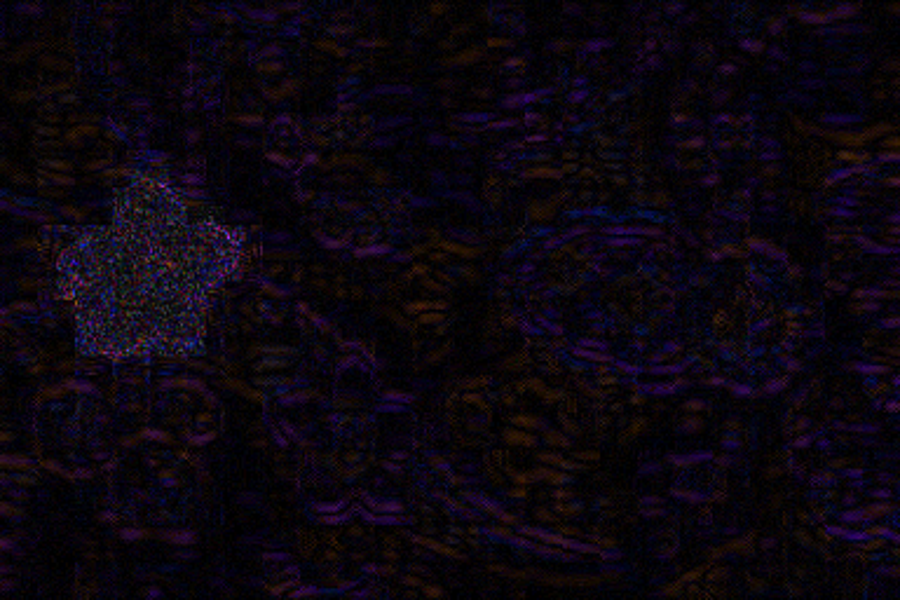

In [ ]:
ela_tmp1 = to_elaimg('/content/gdrive/MyDrive/Image Forgery/Final_Project/Tp/Tp_S_CNN_S_N_txt00050_txt00050_01277.tif',90)
ela_tmp1 = ela_tmp1.resize((900,600))
ela_tmp1
#Tp_S_CNN_S_N_txt00050_txt00050_01277.tif

In [ ]:
del tmp_1

In [ ]:
del ela_tmp1

##DATA PREPARATION


In [ ]:
data_AU = pd.read_csv('/content/gdrive/MyDrive/Image Forgery/Final_Project/CASIA_AU.csv',header=None)
data_Tp = pd.read_csv('/content/gdrive/MyDrive/Image Forgery/Final_Project/CASIA_TP.csv',header=None)

In [ ]:
data_AU.head()

,0,1
0,Au_cha_00003.jpg,0
1,Au_nat_30448.jpg,0
2,Au_sec_30217.jpg,0
3,Au_cha_10160.jpg,0
4,Au_sec_30488.jpg,0


In [ ]:
data_Tp.head()

,0,1
0,Tp_S_NND_S_N_cha00092_cha00092_00412.tif,1
1,Tp_S_CRN_S_N_ind00066_ind00066_10691.jpg,1
2,Tp_D_NRN_M_N_nat10123_nat10122_11336.jpg,1
3,Tp_S_CND_S_N_pla00057_pla00057_00590.tif,1
4,Tp_D_NRN_M_B_ind00053_cha00063_11390.jpg,1


In [ ]:
data_AU[0],data_AU[1]

(0       Au_cha_00003.jpg
 1       Au_nat_30448.jpg
 2       Au_sec_30217.jpg
 3       Au_cha_10160.jpg
 4       Au_sec_30488.jpg
               ...       
 7486    Au_cha_30585.jpg
 7487    Au_nat_20028.jpg
 7488    Au_cha_30209.jpg
 7489    Au_nat_10137.bmp
 7490    Au_arc_30328.jpg
 Name: 0, Length: 7491, dtype: object,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 7486    0
 7487    0
 7488    0
 7489    0
 7490    0
 Name: 1, Length: 7491, dtype: int64)

In [ ]:
data_Tp[0],data_Tp[1]

(0       Tp_S_NND_S_N_cha00092_cha00092_00412.tif
 1       Tp_S_CRN_S_N_ind00066_ind00066_10691.jpg
 2       Tp_D_NRN_M_N_nat10123_nat10122_11336.jpg
 3       Tp_S_CND_S_N_pla00057_pla00057_00590.tif
 4       Tp_D_NRN_M_B_ind00053_cha00063_11390.jpg
                           ...                   
 5118    Tp_S_NRN_S_N_pla20099_pla20099_01999.tif
 5119    Tp_D_NRN_S_N_ani10171_ani00097_12457.jpg
 5120    Tp_S_NRN_S_N_cha10191_cha10191_12328.jpg
 5121    Tp_S_CRN_S_N_pla00070_pla00070_11216.jpg
 5122    Tp_S_NRN_S_N_ind20019_ind20019_01760.tif
 Name: 0, Length: 5123, dtype: object,
 0       1
 1       1
 2       1
 3       1
 4       1
        ..
 5118    1
 5119    1
 5120    1
 5121    1
 5122    1
 Name: 1, Length: 5123, dtype: int64)

In [ ]:
X=[]
Y=[]

In [ ]:
X

[]

In [ ]:
gc.collect()

47

In [ ]:
# Authentic imageset
path ='/content/gdrive/MyDrive/Image Forgery/Au/'
for index,rows in data_AU.iterrows():
    X.append(np.array(to_elaimg(path+rows[0],90).resize((128,128))).flatten() / 255.0)
    Y.append(rows[1])

In [ ]:
len(X)

7491

In [ ]:
# Tampered imageset
path ='/content/gdrive/MyDrive/Image Forgery/Final_Project/Tp/'
for index,rows in data_Tp.iterrows():
    X.append(np.array(to_elaimg(path+rows[0],90).resize((128,128))).flatten() / 255.0)
    Y.append(rows[1])

In [ ]:
len(X)

0

## DATA NORMALIZATION

In [ ]:
with open('/content/gdrive/MyDrive/Image Forgery/Final_Project/Xdata.npy','wb') as f:
  np.save(f,X)
f.close()

In [ ]:
gc.collect()

122

In [ ]:
with open('/content/gdrive/MyDrive/Image Forgery/Final_Project/Xdata.npy','rb') as f:
  X_new=np.load(f)

len(X_new)

12614

In [ ]:
for i in range (0,7491):
  Y.append(0)

for i in range (7491,12614):
  Y.append(1)

In [ ]:
len(Y)

12614

In [ ]:
from keras.utils.np_utils import to_categorical
X=np.array(X_new)
Y=to_categorical(Y,2)

In [ ]:
del X_new

In [ ]:
f.close()

In [ ]:
del f

In [ ]:
gc.collect()

105

In [ ]:
X=X.reshape(-1,128,128,3)

In [ ]:
len(X)

12614

In [ ]:
gc.collect()

0

## Train-test split

In [ ]:
X_train,X_rem,Y_train,Y_rem = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=5)
X_val,X_test,Y_val,Y_test = train_test_split(X_rem,Y_rem,test_size=0.5,shuffle=True,random_state=5)

In [ ]:
del X

In [ ]:
del i

In [ ]:
del Y

In [ ]:
gc.collect()

0

In [ ]:
with open('/content/gdrive/MyDrive/Image Forgery/Final_Project/X_test.npy','wb') as f:
  np.save(f,X_test)
f.close()

import pickle as pkl
with open('/content/gdrive/MyDrive/Image Forgery/Final_Project/Y_test.npy','wb') as f:
  np.save(f,Y_test)
f.close()


In [ ]:
del Y_test

In [ ]:
del X_test

In [ ]:
del f

In [ ]:
del X_rem,Y_rem

In [ ]:
gc.collect()

3

##CNN MODEL BUILDING

In [ ]:
conv_base= VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

In [ ]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

In [ ]:
del conv_base

In [ ]:
gc.collect()

0

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 dropout (Dropout)           (None, 4, 4, 512)         0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 22,122,306
Trainable params: 22,122,306
No

##MODEL COMPILATION

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [ ]:
callback=keras.callbacks.ModelCheckpoint(
               filepath='/home/sohan/Final_Project',
               monitor='val_acc',
               mode='max',
               save_best_only=True)

In [ ]:
del callback


In [ ]:
gc.collect()

803

##MODEL TRAINING

In [ ]:
len(X_train),len(X_test),len(X_val)

(10091, 1262, 1261)

In [ ]:
gc.collect()

0

In [ ]:
epochs=10
batch_size=32

In [ ]:
model_history=model.fit(X_train,Y_train,batch_size=32,epochs=10,
                        validation_data=(X_val,Y_val),
                        verbose=2)

Epoch 1/10
316/316 - 80s - loss: 0.4435 - acc: 0.7978 - val_loss: 0.3625 - val_acc: 0.8668 - 80s/epoch - 255ms/step
Epoch 2/10
316/316 - 63s - loss: 0.3172 - acc: 0.8710 - val_loss: 0.3027 - val_acc: 0.8620 - 63s/epoch - 199ms/step
Epoch 3/10
316/316 - 63s - loss: 0.2828 - acc: 0.8822 - val_loss: 0.2827 - val_acc: 0.8787 - 63s/epoch - 200ms/step
Epoch 4/10
316/316 - 64s - loss: 0.2684 - acc: 0.8932 - val_loss: 0.3067 - val_acc: 0.8620 - 64s/epoch - 202ms/step
Epoch 5/10
316/316 - 64s - loss: 0.2486 - acc: 0.8993 - val_loss: 0.2696 - val_acc: 0.8818 - 64s/epoch - 202ms/step
Epoch 6/10
316/316 - 63s - loss: 0.2395 - acc: 0.9023 - val_loss: 0.2883 - val_acc: 0.8826 - 63s/epoch - 200ms/step
Epoch 7/10
316/316 - 63s - loss: 0.2364 - acc: 0.9048 - val_loss: 0.3033 - val_acc: 0.8731 - 63s/epoch - 201ms/step
Epoch 8/10
316/316 - 64s - loss: 0.2257 - acc: 0.9067 - val_loss: 0.2616 - val_acc: 0.8921 - 64s/epoch - 203ms/step
Epoch 9/10
316/316 - 64s - loss: 0.2284 - acc: 0.9073 - val_loss: 0.6578

In [ ]:
del X_train,Y_train,X_val,Y_val

In [ ]:
gc.collect()

1518

##PERFORMANCE MEASURE

###Training and validation loss and accuracy

In [ ]:
with open('/content/gdrive/MyDrive/Image Forgery/Final_Project/X_test.npy','rb') as f:
  X_test=np.load(f)
f.close()

with open('/content/gdrive/MyDrive/Image Forgery/Final_Project/Y_test.npy','rb') as f:
  Y_test=np.load(f)
f.close()

In [ ]:
len(X_test),len(Y_test)

(1262, 1262)

In [ ]:
del f

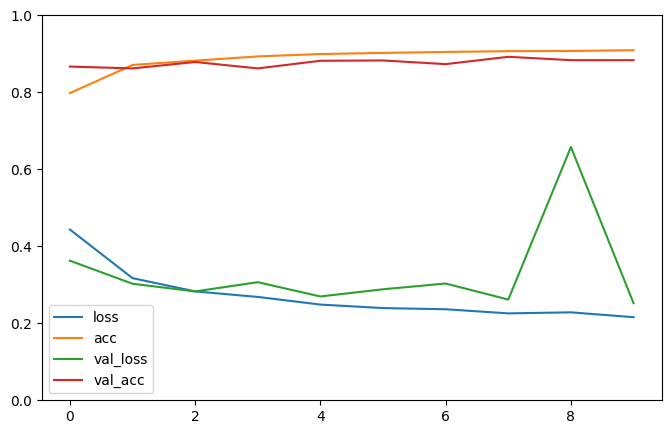

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1)
plt.show()

###Model Accuracy Score

In [ ]:
score = model.evaluate(X_test,Y_test,steps=10)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 [==============================] - 14s 982ms/step - loss: 0.2336 - acc: 0.9089
Test loss: 0.2336072474718094
Test accuracy: 0.9088748097419739


In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis = 1)[:5]
label = np.argmax(Y_test,axis = 1)[:5]

print(pred)
print(label)

40/40 [==============================] - 6s 139ms/step
[0 1 1 0 0]
[0 1 1 0 0]


###Confusion Matrix

40/40 [==============================] - 4s 111ms/step


Text(0.5, 21.34715460257995, 'Predicted label')

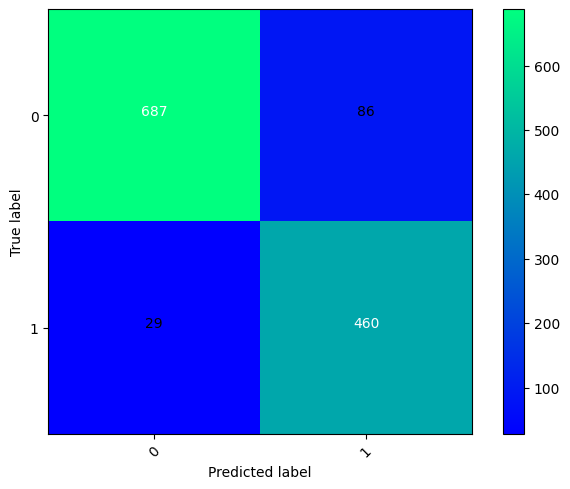

In [ ]:
Y_pred=model.predict(X_test)
Y_classes=np.argmax(Y_pred,axis=1)
Y_true = np.argmax(Y_test,axis = 1)

cm=confusion_matrix(Y_true,Y_classes)
classes=range(2)
plt.imshow(cm, interpolation='nearest', cmap='winter')
#plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

'''if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]'''

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')